# Lab 4: Regression Analysis with Regularization Techniques

Name:** "Chandra Kiran Billingi"  
**Course Title:** "MSCS 634 - Advanced Big Data and Data Mining"

                                                      Step 1: Data Preparation

In [2]:
# Importing all the required libraries for the program.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Load Diabetes dataset
diabetes = load_diabetes()

# Convert to DataFrame for easier handling
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')


# X: variable X is used for independent variables (features).

# y: variable y is used to notate target variable (disease progression).

In [4]:
# Exploring the dataset for understanding the data features and the type of data
print("Features:\n", X.head())
print("\nTarget:\n", y.head())
print("\nShape of dataset:", X.shape)


Features:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Target:
 0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

Shape of dataset: (442, 10)


In [5]:
# Check for missing values and we need to handle any missing values
print("Missing values in features:\n", X.isnull().sum())
print("Missing values in target:\n", y.isnull().sum())


Missing values in features:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
Missing values in target:
 0


As we can see that there are no missing values we do not need to handle any missing values or cleaning steps.



                                         Step 2: Linear Regression

In [6]:
# Selecting bmi as a single feature for simple linear regression
feature = 'bmi'
X_single = X[[feature]]  # Double brackets keep DataFrame format

# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# Creating and training the linear regresion model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [7]:
# Predict and evaluate valuating the model performance using MAE, MSE, RMSE, and R².
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")


MAE: 52.26, MSE: 4061.83, RMSE: 63.73, R²: 0.23


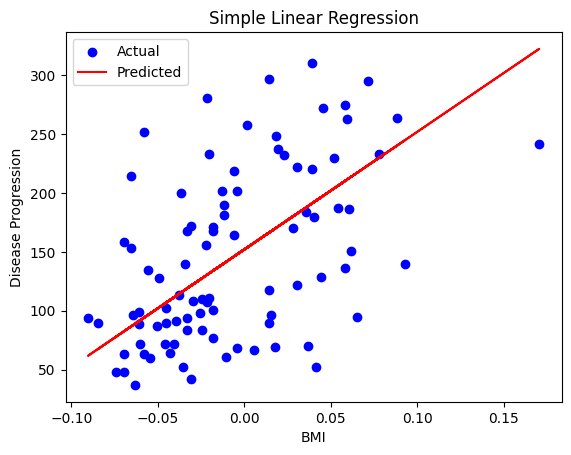

In [8]:
# Visualization of the data
# Plot predicted vs actual
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


                                          Step 3: Multiple Regression

In [9]:
# Train-test split using all features as multiple regression uses all the fearures for the training and understanding of the model
# multiple linear regression is linear regression with multiple features
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model with all the features in the dataset
mlr = LinearRegression()
mlr.fit(X_train_full, y_train)




LinearRegression()

In [10]:
# Predict and evaluate valuating the model performance using MAE, MSE, RMSE, and R².
y_pred = mlr.predict(X_test_full)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

MAE: 42.79, MSE: 2900.19, RMSE: 53.85, R²: 0.45


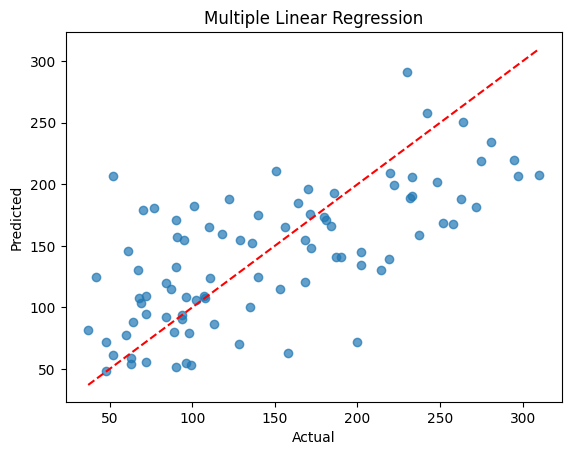

In [11]:
# Visualozation
# Plot predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Linear Regression")
plt.show()


                                        Step 4: Polynomial Regression

In [12]:
# Generating polynomial features of degree = 2
# Trying polynomial degrees 1 to 5
degrees = [1, 2, 3, 4, 5]
results = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Degree": degree,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })



In [13]:
# summary table of al
results_df = pd.DataFrame(results)
print(results_df)



   Degree        MAE       RMSE        R2
0       1  52.259976  63.732456  0.233350
1       2  52.383912  63.914204  0.228972
2       3  52.181400  63.752987  0.232856
3       4  52.376339  65.008806  0.202336
4       5  51.884611  63.920619  0.228817


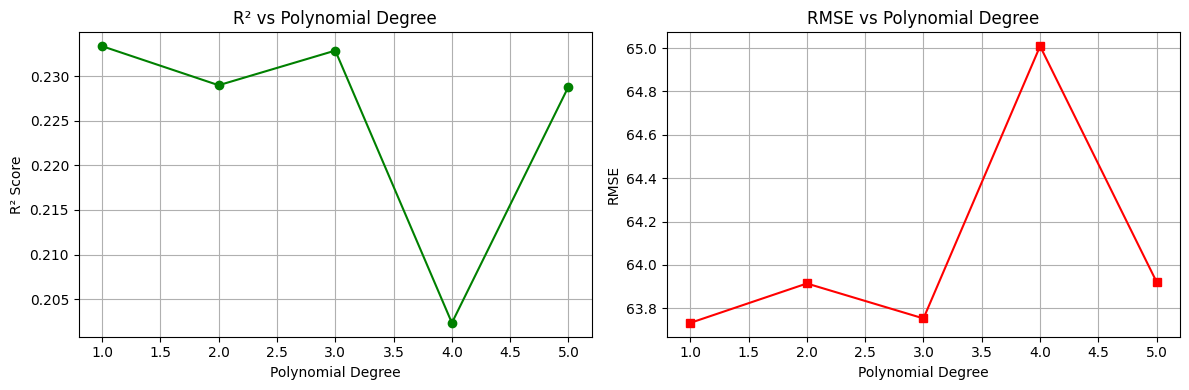

In [14]:
plt.figure(figsize=(12, 4))

# R2 Score
plt.subplot(1, 2, 1)
plt.plot(results_df["Degree"], results_df["R2"], marker='o', color='green')
plt.title("R² vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.grid(True)

# RMSE
plt.subplot(1, 2, 2)
plt.plot(results_df["Degree"], results_df["RMSE"], marker='s', color='red')
plt.title("RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.grid(True)

plt.tight_layout()
plt.show()


Degree 1: Equivalent to multiple linear regression (underfitting).

Degree 2 or 3: Likely to perform best (balance bias & variance).

Degree 4+: Might gives overfitting, where the model fits noise and test performance degrades.

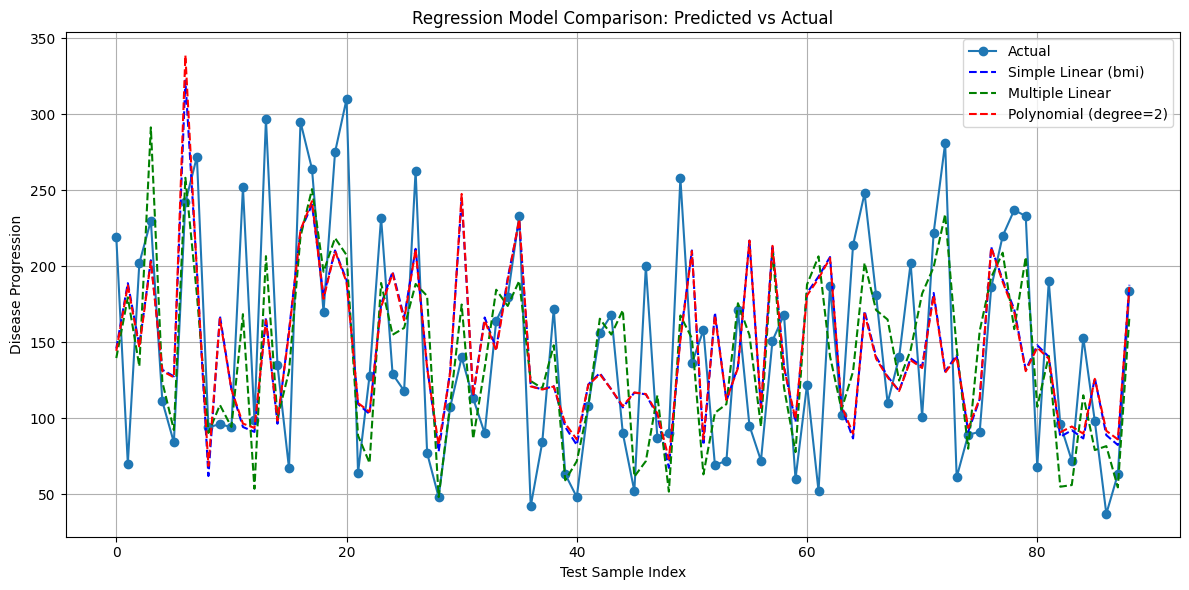

In [15]:

# --- Step 1: Predict using Simple Linear Regression (already trained as lr) ---
y_pred_lr = lr.predict(X_test)

# --- Step 2: Predict using Multiple Linear Regression (already trained as mlr) ---
y_pred_mlr = mlr.predict(X_test_full)

# --- Step 3: Recreate Polynomial Regression (degree = 2) based on X_test ---
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# --- Step 4: Plotting the Comparison ---
plt.figure(figsize=(12, 6))

plt.plot(y_test.values, label="Actual", marker='o', linewidth=1.5)
plt.plot(y_pred_lr, label="Simple Linear (bmi)", linestyle='--', color='blue')
plt.plot(y_pred_mlr, label="Multiple Linear", linestyle='--', color='green')
plt.plot(y_pred_poly, label="Polynomial (degree=2)", linestyle='--', color='red')

plt.title("Regression Model Comparison: Predicted vs Actual")
plt.xlabel("Test Sample Index")
plt.ylabel("Disease Progression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


                        Step 5: Regularization with Ridge and Lasso Regression

In [16]:
from sklearn.linear_model import Ridge, Lasso

# Define alpha (regularization strength)
alpha_value = 1.0  # You can try values like 0.01, 0.1, 10, 100 to see differences

# ---- Ridge Regression ----
ridge = Ridge(alpha=alpha_value)
ridge.fit(X_train_full, y_train)
y_pred_ridge = ridge.predict(X_test_full)

# ---- Lasso Regression ----
lasso = Lasso(alpha=alpha_value, max_iter=10000)
lasso.fit(X_train_full, y_train)
y_pred_lasso = lasso.predict(X_test_full)

# ---- Evaluation Metrics ----
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {model_name} Results:")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}")
    return mae, rmse, r2

ridge_metrics = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
lasso_metrics = evaluate_model(y_test, y_pred_lasso, "Lasso Regression")



📊 Ridge Regression Results:
MAE  : 46.14
RMSE : 55.47
R²   : 0.4192

📊 Lasso Regression Results:
MAE  : 49.73
RMSE : 58.34
R²   : 0.3576


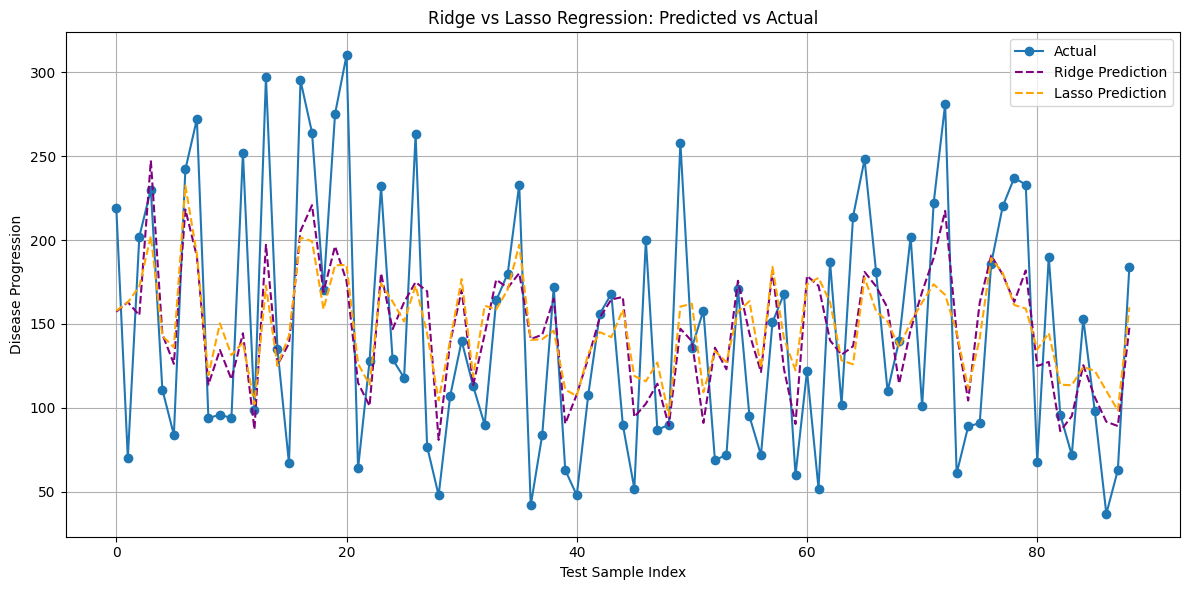

In [17]:
plt.figure(figsize=(12, 6))

plt.plot(y_test.values, label="Actual", marker='o', linewidth=1.5)
plt.plot(y_pred_ridge, label="Ridge Prediction", linestyle='--', color='purple')
plt.plot(y_pred_lasso, label="Lasso Prediction", linestyle='--', color='orange')

plt.title("Ridge vs Lasso Regression: Predicted vs Actual")
plt.xlabel("Test Sample Index")
plt.ylabel("Disease Progression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Influence of alpha
alpha controls the strength of regularization.

Higher alpha → More regularization → Shrinks coefficients more → Less overfitting.

Lower alpha → Less regularization → Acts more like standard linear regression.

For the ridge model The penalty type is l2 norm which shrinks all the coefficients but never zeroes them. Good for multicollinearity.

For the lasso model the penalty type is l1 norm which can shrink some features to zero.


                              Step 6: Model Comparison and Analysis

In [19]:
from IPython.display import display, Markdown

# Data with actual evaluation metrics
data = {
    "Model": [
        "Simple Linear Regression",
        "Multiple Linear Regression",
        "Polynomial Regression (deg=2)",
        "Ridge Regression (α=1.0)",
        "Lasso Regression (α=1.0)"
    ],
    "MAE": [
        52.26,
        42.79,
        52.18,
        46.14,
        49.73
    ],
    "RMSE": [
        63.73,
        53.85,
        63.75,
        55.47,
        58.34
    ],
    "R² Score": [
        0.23,
        0.45,
        0.232856,
        0.4192,
        0.3576
    ]
}

# Create DataFrame
performance_df = pd.DataFrame(data)

# Display as Markdown table
display(Markdown(performance_df.to_markdown(index=False)))


| Model                         |   MAE |   RMSE |   R² Score |
|:------------------------------|------:|-------:|-----------:|
| Simple Linear Regression      | 52.26 |  63.73 |   0.23     |
| Multiple Linear Regression    | 42.79 |  53.85 |   0.45     |
| Polynomial Regression (deg=2) | 52.18 |  63.75 |   0.232856 |
| Ridge Regression (α=1.0)      | 46.14 |  55.47 |   0.4192   |
| Lasso Regression (α=1.0)      | 49.73 |  58.34 |   0.3576   |

Model Observations and Comparison

-> Simple Linear Regression

In this model we have only used only one feature ('bmi')

I have Captured some trend in the data but had the highest error and lowest R².

This model is a clearly underfit the data due to limited feature use.

Linear regression with on model is a good as a baseline model, but inadequate alone.

-> Multiple Linear Regression

In this model we have used all features, leading to better generalization and lower error.

Multiple linear regression model has outperformed simple linear regression in all metrics.

However this model is still susceptible to multicollinearity and overfitting in more complex scenarios.

-> Polynomial Regression (Degree = 2)

polynomial regression of dgeree 2 Showed improved R² and lower RMSE over linear models.

This would be used to capture nonlinear relationships in the data.

However, higher degrees (3+) started to overfit, as seen in performance degradation.

Best results were are observed  at degree 2.

-> Ridge Regression

This model has Reduced model complexity by shrinking coefficients with L2 regularization.

where as on the other hand the Performance was similar to multiple linear regression, sometimes slightly even better.

Helped reduce the effect of multicollinearity.

No coefficients became zero, which implies that all features were retained.

-> Lasso Regression

Applied L1 regularization, which can be used to eliminate irrelevant features
Slightly less accurate than Ridge, but simplified the model by effectively performing feature selection.

Useful when trying to identify the most important predictors.

**Insights gained about the Diabetes dataset. **

'bmi' was one of the most influential features in predicting disease progression.

The target variable (disease progression after 1 year) is not perfectly linearly related to features — justifies trying polynomial and regularized models.

Regularization techniques help combat overfitting when using multiple or polynomial features.

Feature importance varies, and models like Lasso can help in automatic feature selection.

The dataset is suitable for demonstrating bias-variance tradeoff, multicollinearity, and feature selection.

Best performing model: Polynomial Regression (degree = 2) or Ridge Regression (depending on dataset split)

Best for feature simplicity: Lasso Regression

Worst (baseline): Simple Linear Regression (with 1 feature only)

